# Lecture 12.  Additional Python things: good to know
29.11.2025

- $\lambda$-функции
- *f*-строки
- Исключения

## $\lambda$-функции

Это попросту альтернативный механизм создания функций. Выглядит это так:

```python
lambda x, y: print(x + y)
```

Оно состоит из 3-х частей:

- Ключевое слово `lambda` - объявляет создание $\lambda$-функции
- Перечесление ожидаемых аргументов
- Тело функции
  
При этом как видете во всем этом деле никак не фигурирует имя функции. В теории $\lambda$-функции можно присвоить имя:

```python
f = lambda x, y: print(x + y)
```

Интересно, что здесь немного стираются границы между функциями и переменными. В python есть просто объекты и ссылки на них (имена). При этом имена вообще не знают о том, являются ли объекты под ними callable или нет.

Именования $\lambda$-функции соотвествует записи:

```python
def f(x, y):
    print(x, y)
```

Однако, **не надо именовать $\lambda$-функции**. $\lambda$-функции еще принято называть "анонимными", подчеркивая что им не принято давать имена.

### Зачем нужны $\lambda$-функции? ###
Чтобы быстро и немногословно определить и сразу же использовать функцию именно там где нужно.

### Пример $\lambda$-1. Работа с дата-фреймами
1. Можно лакончино что-нибудь переименовать
2. Можно лаконично что-то сделать с данными

In [69]:
df = pd.DataFrame({'col1_start': [1, 2, 3],
                   'col2_end': [5, 6, 7],
                   'col3_value': [0, 0, 2]
                  })

df

,col1_start,col2_end,col3_value
0,1,5,0
1,2,6,0
2,3,7,2


In [70]:
df.apply(lambda x: x / x.sum(), axis=0) # нормировка 

,col1_start,col2_end,col3_value
0,0.166667,0.277778,0.0
1,0.333333,0.333333,0.0
2,0.500000,0.388889,1.0


In [71]:
df.rename(lambda x: x.split('_')[1], axis=1) # переименование колонок

,start,end,value
0,1,5,0
1,2,6,0
2,3,7,2


### Пример $\lambda$-2. Соленый язык без проблем с регистром

In [72]:
import re

def salt(text):
    vowels = r'([ауоиэыяюеёАУОИЭЫЯЮЕЁ])'
    return re.sub(vowels, 
                  lambda x: x.group(0) + 'c' + x.group(0).lower(), 
                  text) 


In [73]:
salt('Ура!') # дубликат буквы "У" в нижнем регистре

'Уcураcа!'

### Где испольовать $\lambda$-функции, а где обычные?
- Если код функции не влезает в 1 строчку - вам нужна обычная
- Если функция используется более 1 раза - вам нужна обычная
- Если вам нужно дать функции имя - вам нужна обычная
- Если вам нужно применить небольшую функцию к набору данных - вам нужна $\lambda$-функция
- Если вы не уверены, вам нужна обычная функция

## *F*-строки

F - от слова *format*. Они нужны, когда мы хотим каким либо образом модифицировать (форматировать) строки в нашем коде.

Например, я получаю имя человека и хочу с ним поздороваться. Это можно сделать и через сложение строк:

In [52]:
greeting = 'Hello, my name is '
name = 'nikita'
greeting + name

'Hello, my name is nikita'

Но то же самое можно сделать с помощью форматирования строк. Для этого в начале строки ставится символ f и нужные нам объекты передаются внутри `{` фигурных `}` скобок.

In [53]:
f'Hello, my name is {name}'

'Hello, my name is nikita'

### Несколько фактов про f-строки.
  
- **F-строки удобно использовать во всяких таких историях шаблон + конкретный объект.**

In [55]:
names = ('nikita', 'sasha', 'lena')
for name in names:
    print(f"Hello, my name is {name}!")

Hello, my name is nikita!
Hello, my name is sasha!
Hello, my name is lena!


- **Внутри фигурных скобок можно делать какие-то операции.** <br/>
  Например, было бы логично сделать имя с заглавной буквы

In [56]:
f"Hello, my name is {name.capitalize()}!"

'Hello, my name is Lena!'

Можно математические операции делать

In [58]:
my_num = 2
f"Your number is {my_num + 1}"

'Your number is 3'

Но будьте аккуратнее! Какую-то одну штучку сделать ок. Если же вы там какую-то обработку будете делать, это уже будет плохо читаться. Сперва делайте обработку, потом подставляйте в шаблон, чтобы не было все вперемешку.

- **Внутри фигурных скобок можно информативно отобразить переменную:**

In [59]:
age = 22
print(f' My {age}')
print(f' My {age = }') 

 My 22
 My age = 22


- **Внутри фигурных скобок форматировать числа с помощью `:`:**

In [60]:
pi = 3.141592653589793846
print(f"Pi is {pi}!")
print(f"Pi is {pi:.2f}!") # float-point, 2 знака после запятой
print(f"Pi is {pi:.3e}!") # exponential, 3 знака после запятой

Pi is 3.141592653589794!
Pi is 3.14!
Pi is 3.142e+00!


In [61]:
print(f"Pi is {pi = :.2f}!") # кстати можно комбинировать:)

Pi is pi = 3.14!


- **Текст внутри можно дополнительно оформлять для печати:** <br/>Мы тут:

    - Ставим : чтобы задать правила оформления
    - Ставим число чтобы задать ширину блока в символах (штуках)
    - Между : и числом можно поставить любой символ из < ^ > чтобы выровнять текст (влево, по-центру и вправо). По-умолчанию выравнивание вправо.
    - Между : и символом выравнивания можно добавить символ, которых будет заполнять пустоту

In [62]:
pi = 3
print(f"Pi is {pi}!")
print(f"Pi is {pi:10}! (ширина 10, вправо (дефолт))")
print(f"Pi is {pi:<10}! (ширина 10, влево)")
print(f"Pi is {pi:^10}! (ширина 10, по-центру)")
print(f"Pi is {pi:>10}! (ширина 10, вправо)")
print(f"Pi is {pi:-^10}! (ширина 10, по-центру, заполнили пустоту)")
print(f"Pi is {pi:=^10}! (ширина 10, по-центру, заполнили пустоту)")

Pi is 3!
Pi is          3! (ширина 10, вправо (дефолт))
Pi is 3         ! (ширина 10, влево)
Pi is     3     ! (ширина 10, по-центру)
Pi is          3! (ширина 10, вправо)
Pi is ----3-----! (ширина 10, по-центру, заполнили пустоту)
Pi is ====3=====! (ширина 10, по-центру, заполнили пустоту)


- **Можно форматировать не только текст и числа, но и целые даты!:**

Здесь используются символы через `%`. Посмотреть значение каждого можно в [табличке тут](https://docs.python.org/3/library/datetime.html#datetime.timezone). Между ними можно писать что угодно

In [63]:
import datetime
today = datetime.datetime.today()
print(f"{today:%Y-%m-%d}") # год месяц день
print(f"{today:Year %Y, month %m, day %d}") # год месяц день
print(f"{today:%H:%M (%I:%M%p)}") # часы:минуты (часы:минуты в 12-часовом формате)

2024-11-29
Year 2024, month 11, day 29
18:44 (06:44PM)


- **Можно делать f-строки вложенными, если менять типы кавычек:**

In [64]:
x = 'F-string'
print(f'''-{f"""*{f"+{f'.{x}.'}+"}*"""}-''')

-*+.F-string.+*-


### Применения f-строк в биоинформатике
Тут чисто примеры, самих применений немеренное множество

1) Писать сообщение пользователю <br/>
Например, если он ввел вам неправильную операцию

In [65]:
operation = 'multiply'
operations = ['add', 'divide']

if operation not in operations:
    print( f"Unknown operation {operation}!")

Unknown operation multiply!


2) Простейшее логгирование - уведомлять какой образец был обработан

In [67]:
# Набор образцов
samples = [
    'A1', 'A2', 
    'B1', 'B2'
]

# Функция которую нам нужно с ними сделать (очень полезная, но долгая)
def some_doings(data):
    for i in range(1, 10000):
        nothing = 0
    return data

# перебираем образцы
for sample in samples:
    print(f'{sample:-^32}') # взяли образец
    print('Start doings') # оповестили что начали работу
    sample = some_doings(sample)
    print(f'Sample {sample} succesefully processed\n') # оповестили о завершении

---------------A1---------------
Start doings
Sample A1 succesefully processed

---------------A2---------------
Start doings
Sample A2 succesefully processed

---------------B1---------------
Start doings
Sample B1 succesefully processed

---------------B2---------------
Start doings
Sample B2 succesefully processed



3) Читать и записывать файлы с сложными названиями, формировать названия образцов и т.п.

In [68]:
import os

# Набор образцов
samples = [
    'A1', 'A2', 
    'B1', 'B2'
]

def read_file(path):
    return 666

# перебираем образцы
for sample in samples:
    filename = f'ChIPSeq_{sample}_filtered.fastq.gz'
    path = os.path.join('data', filename)
    print(f'Reading file `{path}`' )

Reading file `data/ChIPSeq_A1_filtered.fastq.gz`
Reading file `data/ChIPSeq_A2_filtered.fastq.gz`
Reading file `data/ChIPSeq_B1_filtered.fastq.gz`
Reading file `data/ChIPSeq_B2_filtered.fastq.gz`


Тут понятно можно выдумывать что-то совсем жуткое))

```python
for qval in (0.01, 0.05):
    for res in (50000, 100000):
        for bl in (0.01, 0.1, 0.5):
            filename = f"HiC_{res//1000}kb_bl{bl}_merged_all_q{qval}.pkl"
            path = os.path.join('data', filename)
            df = pd.read_pickle(path)
```

## Исключения

В Python существуют исключения, хотя мы их обычно называем ошибками.

In [74]:
1 / 0

ZeroDivisionError: division by zero

In [75]:
my_dict = {0: 1, 1: 0}

my_dict[2]

KeyError: 2

Исключения можно не только созерцать в слезах но и **обрабатывать**. Давайте вспомним хорошо вам известную констирукцию `if-else`:

```python
if <condition>:
    something()
elif <other condition>:
    other_something()
else: 
    somtehing_else()
```

По аналогии можно легко понять конструкцию для обработки исключений: `try-except`

```python
try:
    something_dangerous()
except (ValueError, ArithmeticError):
    something()
except TypeError as e:
    something_else(e)
except:
    another_one_something()
```

- Можно просто обработать ситуацию возникновения исключения, а можно что-то сделать с самим исключением. Для этого его нужно перехватить с помощью `as e`. Имя `e` может быть любым, но в таком варианте является конвенцией
- Исключение `e` обрабатывается веткой `except`, если её первый аргумент expr можно сопоставить с исключением: `isinstance(e, expr)`
- При наличии нескольких веток `except` интерпретатор сверху вниз ищет подходящую.
- Переменная `e` существует только внутри блока `except`


In [77]:
try:
    print('Trying 1/0')
    1/0
except ZeroDivisionError as e:
    print('e:', e)

print('Exited')
print(e)

Trying 1/0
e: division by zero
Exited


NameError: name 'e' is not defined

Если еще некоторые ключевые слова:
- `finally` - выполнится после `try-except` в любом случае
- `else` - выполнится после `try-except` если ошибки не случилось

In [78]:
var  = 0
try:
    var = 1/var
except ZeroDivisionError as e:
    print('e:', e)
else:
    var = var/1
finally:
    print(var)

e: division by zero
0


In [79]:
var  = 1
try:
    var = 1/var
except ArithmeticError as e:
    print('e:', e)
else:
    var = var/1
finally:
    print(var)

1.0


Эти блоки (`else` и `finally`) используются не так часто, но иногда они полезны. **Ключевое правило при работе с `try-except`** - делать это только там где нужно. ***Не пишите весь код внутри try-except***. Используйте его на конкретных строчках где возможна ошибка. Ну и помните, что возможно по логике вам нужен не try-except, а предварительное условие с проверкой данных. А может вам не нужно ни того ни другого. ***Ловить исключения не всегда хорошо!*** Если программа упала с ошибкой - это здорово, мы этого ожидаем. Вот если ошибка есть, а программа не упала - вот это очень плохо. Поэтому если что-то в вашем коде падает - скорее всего лучше просто оставить как есть чтобы оно падало. Самый частый кейс ловли исключений - для сохранения инфы в файл с логами. Ловить исключения просто чтобы их не было не правильно!

### Дерево наследований исключений

Давайте представим такую ситуацию. Вы решили посчитать с помощью `numpy` $\sqrt{-1}$. Каков будет результат?

In [82]:
np.sqrt(-1)

/tmp/ipykernel_144/3438155168.py:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(-1)


np.float64(nan)

Будет `np.nan`... Что-ж. Давайте воспользуемся специальным контекстным менеджером numpy который сделает код сильно более требовательным к правильности операций:

In [83]:
with np.errstate(invalid='raise'):
    np.sqrt(-1)

FloatingPointError: invalid value encountered in sqrt

Вот мы получили ошибку `FloatingPointError`. Супер! А теперь представьте что вы в вашей программе хотите поймать абсолютно любую арифметическую ошибку: деление на 0, корень из -1 и всё что угодно еще.

Предусмотреть все возможные варианты? 

На самом деле - можно отловить родительское исключение - `ArithmeticError`. Да, у исключений ей четкая иерархия наследования. Если вы ловите какое-то исключение, то это значит что вы поймаете и любое из его наследников. Но не родителей, логично.


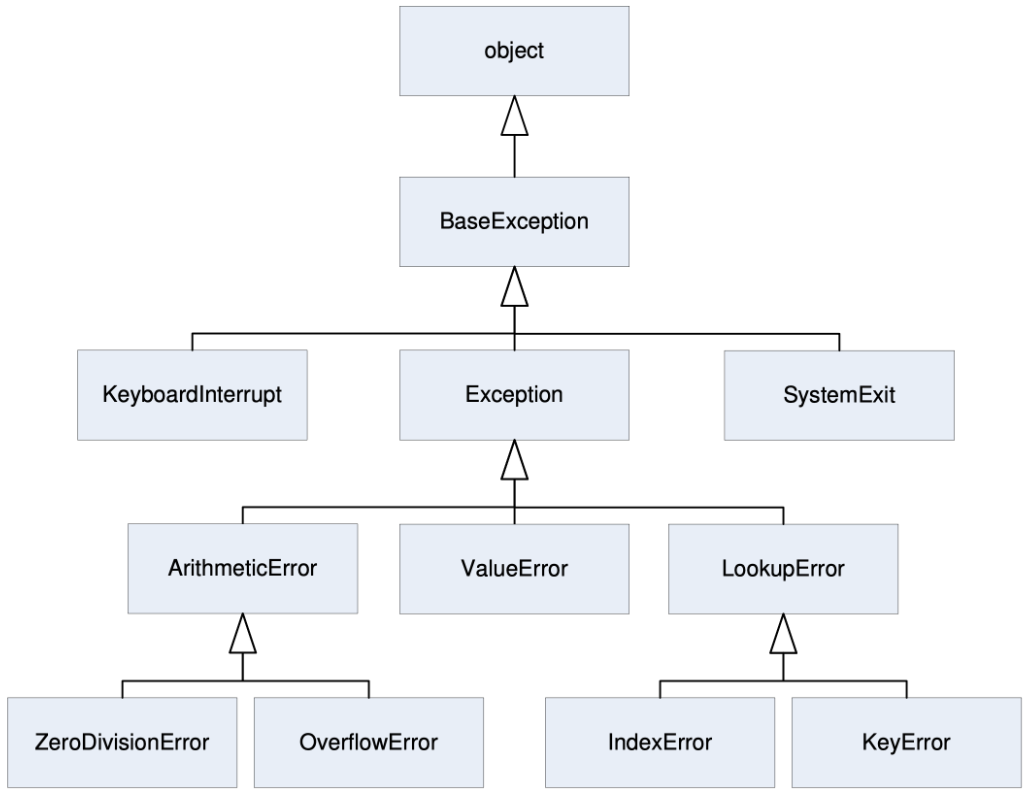

Вообще не принято уходить слишком "наверх". Лучше ловить конкретные исключения. В саааамом худшем случае можно ловить `Exception`. ***НИКОГДА*** не ловитие ничего выше него. Попытка написать:

```python
try:
    ...
except BaseException:
    ...
```

Приведет к тому что вы, например, словите в том числе и прерывание с клавиатуры. То есть вы не сможете остановить свою программу по `Ctrl + C`. И даже `SystemExit` её не остановит.

--- 

Тем не менее, а как вообще устроено это дерево наследований, как устроены исключения, и как устроены вообще любые объекты в питоне - это мы начнем узнать на первой лекции следующего семестра. 